In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 看涨或看跌期权的BSM
def BSM(S,K,r,sigma,T,q=0,label='call'):
    """
    S:t=0时刻的股价
    K:执行价格
    r:无风险利率
    sigma:波动率
    T:到期时间
    q:分红率
    
    """
    d1 = (np.log(S/K)+(r-q+pow(sigma,2)/2)*T)/(sigma*np.sqrt(T))
    d2 = (np.log(S/K)+(r-q-pow(sigma,2)/2)*T)/(sigma*np.sqrt(T))
    c = S*np.exp(-q*T)*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    p = K*np.exp(-r*T)*norm.cdf(-d2)-S*np.exp(-q*T)*norm.cdf(-d1)
    if label == 'call':
        return c
    elif label == 'put':
        return p

In [14]:
# 一般未定权益
def BSM_2(f,S,K,r,sigma,T,q=0):
    """
    f:期权到期日价值关于标的资产价格的函数
    S:t=0时刻的股价
    K:执行价格
    r:无风险利率
    sigma:波动率
    T:到期时间
    q:分红率
    
    """
    pdf = lambda x:1/np.sqrt(2*np.pi)*np.exp(-x**2/2)  # 标准正态分布概率密度函数
    S_T = lambda x:S*np.exp((r-q-1/2*sigma**2)*T+sigma*np.sqrt(T)*x)  # 到期日股价函数
    func = lambda x:f(S_T(x))*pdf(x)  # 被积函数
    x_list = np.linspace(-2,10,100)
    y_list = [func(x) for x in x_list]
    #plt.plot(x_list,y_list)
    # 未定权益到期日价值的期望(这里将上下限设为100是由于设为无穷会报错,因此根据绘制的被积函数曲线选择合适的积分区间)
    V_T = integrate.quad(func,-100,100)[0]  
    return np.exp(-r*T)*V_T

In [15]:
K = 2400
T = 1.5
S = 35
sigma = 0.42
r = 0.0255
f = lambda x:x**2

1658.2964558166627

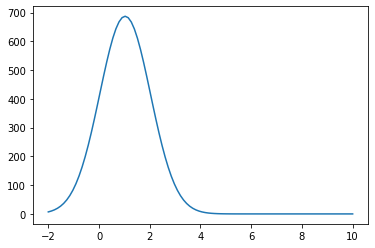

In [16]:
BSM_2(f,S,K,r,sigma,T,q=0)